In [1]:
import pandas as pd
import numpy as np

import librosa
import librosa.display
import IPython.display as ipd

import matplotlib.pyplot as plt
%matplotlib inline

import time
import scipy
import scipy.signal as signal

## Exercício 1

In [2]:
def plot_signal(t, x):
    fig, ax = plt.subplots()
    ax.plot(t, x)
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Amplitude')
    
def plot_spectrogram(fs, x):
    hop_length = 64
    n_fft = 128
    n_window = 128

    X = librosa.stft(x, win_length = n_window, n_fft = n_fft, hop_length = hop_length, window = 'hamming')
    D = librosa.amplitude_to_db(np.abs(X), ref=np.max)

    librosa.display.specshow(D, y_axis = 'linear', x_axis='time', sr = fs, hop_length=hop_length, vmin=-50, vmax=0) # , cmap='gray_r'
    plt.colorbar(format='%+2.0f dB')
    plt.title('Linear-frequency power spectrogram')

In [3]:
fs = 5000 # > 2 * frequência do sinal

a) Temos energia em uma única faixa de frequência (f = 1000 Hz)

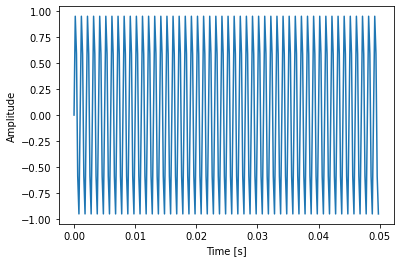

In [4]:
t = np.arange(0.0, 0.050, 1/fs)
f = 1000
x = np.sin(2 * np.pi * f * t)
plot_signal(t, x)

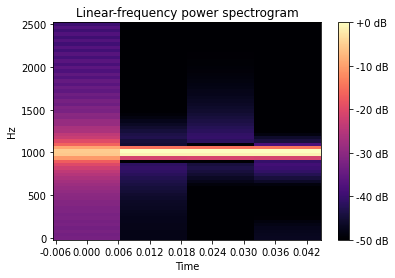

In [5]:
plot_spectrogram(fs, x)

b) Temos energia em duas faixas de frequência (f1 = 500 Hz, f2 = 1000 Hz)

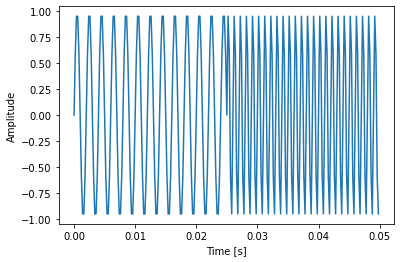

In [6]:
t1 = np.arange(0.000, 0.025, 1/fs)
f1 = 500
x1 = np.sin(2 * np.pi * f1 * t1)

t2 = np.arange(0.025, 0.050, 1/fs)
f2 = 1000
x2 = np.sin(2 * np.pi * f2 * t2)

t = np.hstack([t1, t2])
x = np.hstack([x1, x2])

plot_signal(t, x)

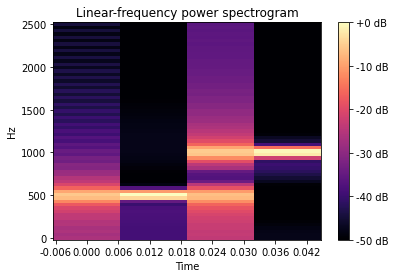

In [7]:
plot_spectrogram(fs, x)

c) Temos energia em duas faixas de frequência, separadas por uma faixa sem energia (f1 = 1000 Hz, f2 = 0 Hz, f3 = 500 Hz)

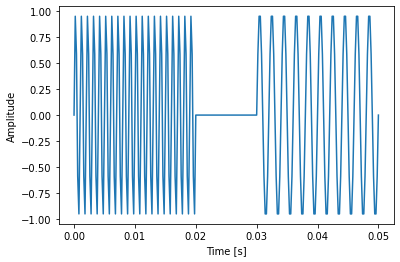

In [8]:
t1 = np.arange(0.000, 0.020, 1/fs)
f1 = 1000
x1 = np.sin(2 * np.pi * f1 * t1)

t2 = np.arange(0.020, 0.030, 1/fs)
x2 = np.zeros(len(t2))

t3 = np.arange(0.030, 0.050, 1/fs)
f3 = 500
x3 = np.sin(2 * np.pi * f3 * t3)

t = np.hstack([t1, t2, t3])
x = np.hstack([x1, x2, x3])

plot_signal(t, x)

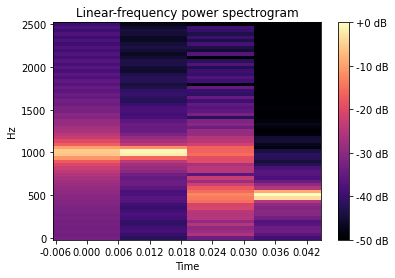

In [9]:
plot_spectrogram(fs, x)

d) Temos energia em uma faixa de frequência crescendo linearmente no tempo: $f(t) = a * t$, em que $a = 2000 / 0.05 = 400$

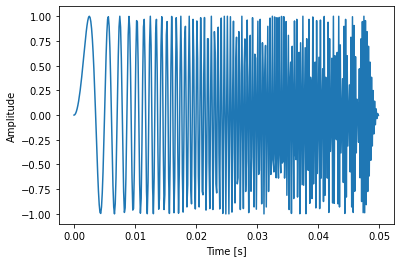

In [10]:
t = np.arange(0.0, 0.050, 1/8000)
x = np.array([])
for n in t:
    f = 2000 / 0.050 * n
    #print("{} s => {} Hz".format(n, f))
    x_n = np.sin(2 * np.pi * f * n)
    x = np.hstack([x, x_n])
plot_signal(t, x)

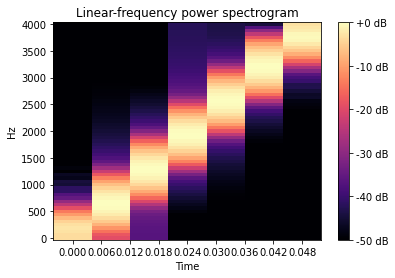

In [11]:
plot_spectrogram(8000, x)

e) Temos energia em uma faixa de frequência crescendo exponencialmente no tempo: $f(t) = a*exp(bt)$, em que $a = 1$ (pois em $t = 0$ temos $f(t=0) = 1 Hz$) e $b = ln(2000)/5$ (pois em $t=5 s$ temos $f = 2000 Hz$). Adicionamos um fator de $1 / 0.01$ para facilitar a visualização.

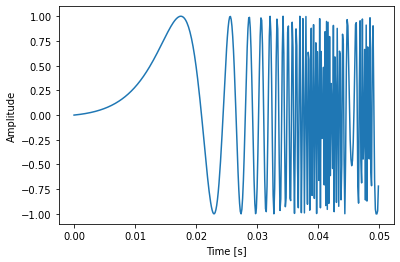

In [12]:
t = np.arange(0.0, 0.050, 1/8000)
x = np.array([])
for n in t:
    f = np.exp(np.log(2000) / 5 * n / 0.01)
    #print("{} s => {} Hz".format(n, f))
    x_n = np.sin(2 * np.pi * f * n)
    x = np.hstack([x, x_n])
plot_signal(t, x)

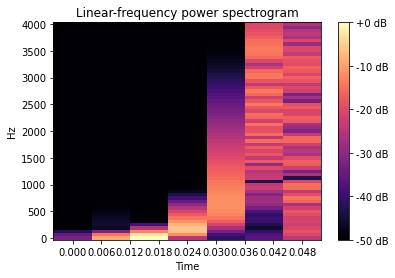

In [13]:
plot_spectrogram(8000, x)

f) Temos energia em várias faixas de frequência (f1 = 450 Hz, f2 = 875 Hz, f3 = 1300 Hz, f4 = 1750 Hz)

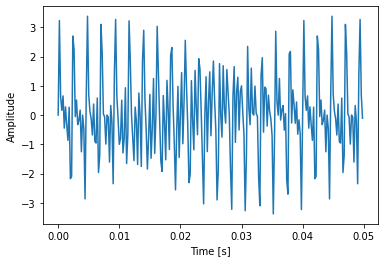

In [14]:
t = np.arange(0.000, 0.050, 1/fs)

f1 = 450
x1 = np.sin(2 * np.pi * f1 * t)

f2 = 875
x2 = np.sin(2 * np.pi * f2 * t)

f3 = 1300
x3 = np.sin(2 * np.pi * f3 * t)

f4 = 1750
x4 = np.sin(2 * np.pi * f4 * t)

x = np.sum([x1, x2, x3, x4], axis=0)

plot_signal(t, x)

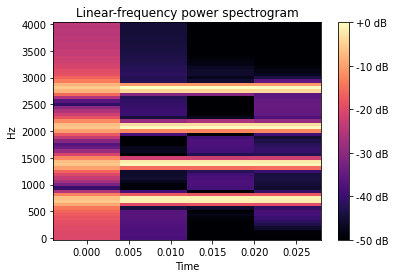

In [15]:
plot_spectrogram(8000, x)

## Exercício 2

a) A frequência máxima apresentada no espectrograma é $f_{max} = 4 kHz$. Logo, segundo o teorema de Nyquist, a frequência de amostragem precisa ser $f_s \geq 2 f_{max}$, ou seja, $f_s = 8 kHz$.

b) A resolução em frequência é $f_{res} = 10 Hz$. Logo, a quantidade de pontos para cálculo da FFT é $N = f_{s} / f_{res} = 8 kHz / 10 Hz$, ou seja, $N = 800$ amostras. Como estamos considerando o tamanho da janela igual à quantidade de amostras utilizadas para a FFT, então temos que o tamanho da janela é de 800 amostras.

c) A resolução temporal é $t_{res} = 0.05 s = 50 ms$. Portanto, o tamanho do _hop_ é a quantidade de pontos que cabem dentro do espaço de tempo de 50 ms. Ao multiplicarmos pela frequência de amostragem, temos a quantidade de amostras dentro do _hop_: $t_{res} * f_{s} = 0.05 s * 8 kHz = 400$ amostras.

Obs.: Como usamos 800 pontos para o cálculo da FFT e temos um _hop size_ de 400 amostras, temos um _overlap_ de 400 amostras.

## Exercício 3

<img src="images/sons_vozeados_nao_vozeados.png" />

## Exercício 4

In [80]:
x, sr = librosa.load("./audios/profissao_aeromoca.wav", sr = 16000, mono = True)

In [81]:
ipd.Audio(x, rate=sr)

In [82]:
x

array([ 0.00033569,  0.00073242,  0.00216675, ..., -0.00262451,
       -0.00564575, -0.00628662], dtype=float32)

In [83]:
len(x)

68326

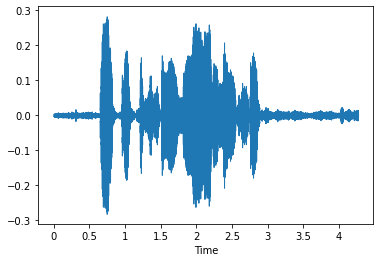

In [84]:
librosa.display.waveshow(x, sr=sr)

In [85]:
1/16000

6.25e-05

$f_{s} = 16 kHz$, ou seja, 16.000 amostras por segundo, 0,00625 s por amostra.

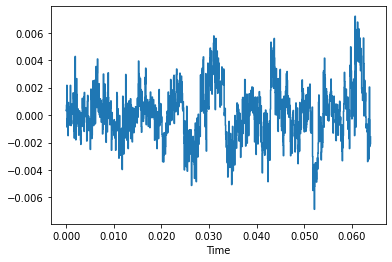

In [86]:
librosa.display.waveshow(x[0:1024], sr=sr)

Vou utilizar um tamanho de segmento de 1024 amostras e _hop_ de 512 amostras. Ou seja, teremos 50% de sobreposição. Como o sinal tem 68326 amostras ao todo, teremos 68326 / 512 = 134 _frames_.

In [180]:
def get_signal_analysis(x, frame_length, hop_length):
    zero_cross = librosa.feature.zero_crossing_rate(x, frame_length=frame_length, hop_length=hop_length)
    S, phase = librosa.magphase(librosa.stft(x, n_fft=frame_length, hop_length=hop_length, win_length=frame_length, window='hann'))
    energies = librosa.feature.rms(S=S, frame_length=frame_length, hop_length=hop_length)
    return zero_cross, energies

def plot_signal_analysis(x, sr, frame_length, hop_length, zero_cross, energies):
    plt.figure(figsize=(20, 5))
    librosa.display.waveshow(x, sr=sr)
    plt.title("Sinal de voz")
    
    count_frames = int(np.ceil(len(x) / hop_length))
    xaxis = list(range(count_frames))
    xaxis = xaxis[::2]
    
    plt.figure(figsize=(20, 5))
    plt.plot(zero_cross[0])
    plt.title("Zero crossing")
    plt.xlabel("Frame")
    plt.ylabel("Taxa de zero crossing")
    plt.xticks(xaxis, rotation=90)
    
    plt.figure(figsize=(20, 5))
    plt.plot(energies[0])
    plt.title("Energia")
    plt.xlabel("Frame")
    plt.ylabel("Valor de RMS")
    plt.xticks(xaxis, rotation=90)

In [181]:
zero_cross, energies = get_signal_analysis(x, frame_length, hop_length)

In [182]:
len(x)

68326

In [183]:
len(zero_cross[0])

134

In [184]:
len(energies[0])

134

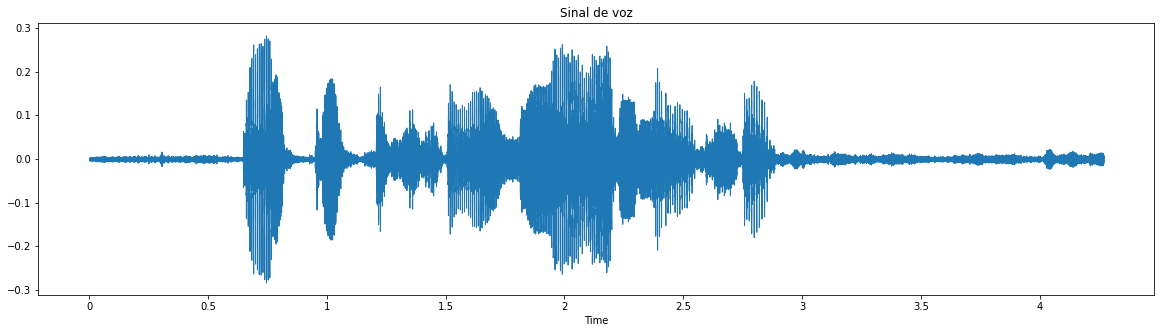

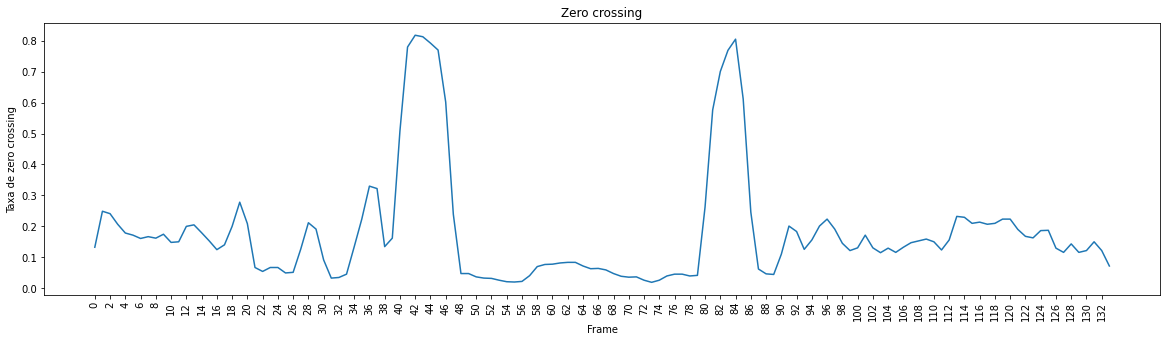

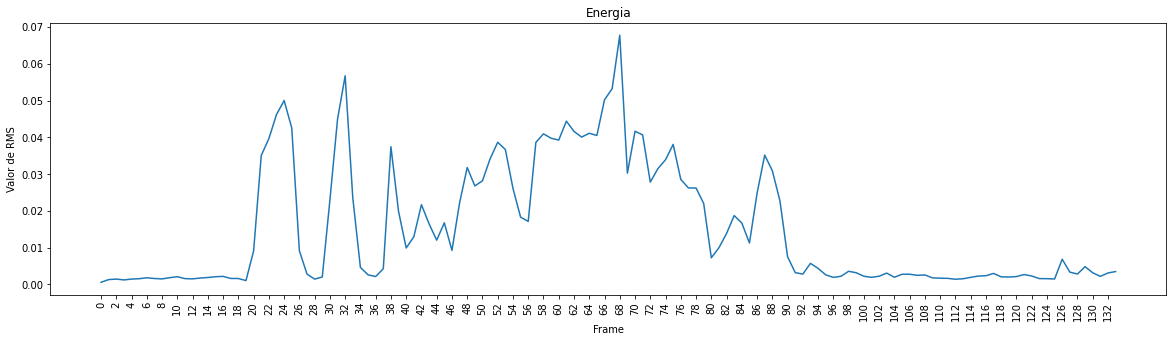

In [185]:
plot_signal_analysis(x, sr, frame_length, hop_length, zero_cross, energies)

**Conclusão:** Conseguimos identificar o mesmo padrão de sons vozeados e não vozeados a partir da análise de zero  crossing e energia, em relação à marcação de sons vozeados e não vozeados que fizemos no exercício 3:

- O áudio começa no frame 20
- Frame 24: Primeiro pico de energia corresponde a um vale no zero crossing: Trecho "A (...)" (V)
- Frame 28: Primeiro vale de energia corresponde a um pico no zero crossing: Trecho "(...) pr (...)" (N)
- Frame 32: Segundo pico de energia corresponde a um vale no zero crossing: Trecho "(...) o (...)" (V)
- Frame 36: Segundo vale de energia corresponde a um pico no zero crossing: Trecho "(...) f (...)" (N)
- Frame 38: Terceiro pico de energia corresponde a um vale no zero crossing: Trecho "(...) i (...)" (V)
- Frames 40-46: Terceiro vale de energia corresponde a um pico no zero crossing: Trecho "(...) ss (...)" (N)
- Frames 48-54: Quarto pico de energia corresponde a um vale no zero crossing: Trecho "(...) ão (...)" (V)
- Frame 56: Quarto vale de energia: Trecho "(...) d (...)" (N)
- Frames 58-66: Quinto pico de energia corresponde a um vale no zero crossing: Trecho "(...) a a (...)" (V)
- Frame 68: Sexto pico de energia corresponde a um vale no zero crossing: Trecho "(...) e (...)" (V)
- Frame 69: Vale de energia: Trecho "(...) r (...)" (N)
- Frame 70: Pico de energia: Trecho "(...) o (...)" (V)
- Frame 73: Vale de energia: Trecho "(...) m (...)" (N)
- Frames 74-78: Pico de energia: Trecho "(...) o (...)" (V)
- Frames 80-86: Vale de energia corresponde a um pico no zero crossing: Trecho "(...) ç (...)" (N)
- Frames 86-90: Pico de energia corresponde a um vale no zero crossing: Trecho "(...) a" (V)
- O áudio acaba no frame 92

In [186]:
#def segment_signal(x, length, hop):
#    segments = []
#    for i in range(0, len(x), hop):
#        segment = x[i:i+length]
#        segments.append(segment)
#    return segments

In [187]:
#frame_length = 1024
#hop_length = 512
#x_segments = segment_signal(x, length=frame_length, hop=hop_length)

In [188]:
#zero_cross_list = []
#energy_list = []
#for i in range(len(x_segments)):
#    segment = x_segments[i]
#    print("Segmento {}:".format(i))
#    
#    # Atributos
#    zero_cross = librosa.feature.zero_crossing_rate(segment, frame_length=frame_length, hop_length=hop_length, center=False)
#    zero_cross_list.append(zero_cross)
#    S, phase = librosa.magphase(librosa.stft(segment, n_fft=frame_length, hop_length=hop_length, win_length=frame_length, window='hann', center=False))
#    energy = librosa.feature.rms(S=S, frame_length=frame_length, hop_length=hop_length)
#    energy_list.append(energy)
#    print("Zero cross: {}".format(zero_cross))
#    print("Energia: {}".format(energy))
#    
#    # Plot
#    plt.figure()
#    librosa.display.waveshow(segment, sr=sr)
#    plt.show()    

### Exercício 5

<img src="images/secador.png" />

a) Resposta: Secador. Justificativa: Percebemos que o primeiro fonema é um sinal com características de banda larga concentrado nas altas frequências do espectrograma, sendo bastante característico do fonema /s/. Também percebemos que, em seguida, há três intervalos intercalados de sons vozeados e não vozeados, ou seja, temos três sílabas bem definidas.

<img src="images/ventilador.png" />

b) Resposta: Ventilador. Justificativa: Como é o áudio com a maior duração, trata-se da maior palavra (é a única palavra com 4 sílabas). Além disso, conseguimos perceber 4 sons vozeados intercalados por sons não vozeados. Também é notório o fonema /t$\int$/, que tem característica de banda larga, e altas frequências no espectrograma.

<img src="images/tv.png" />

c) Resposta: TV. Justificativa: Como é o áudio com a menor duração, trata-se da menor palavra (é a única palavra com duas sílabas). Além disso, conseguimos perceber 2 sons vozeados intercalados por um som não vozeado. Esses sons vozeados têm aproximadamente a mesma intensidade, ao passo que o segundo (/e/) tem uma duração maior, decaindo em intensidade com o tempo. Para o primeiro (/e/), precebemos que se concentra em frequências mais baixas, caracterizando um som vozeado.

<img src="images/lampada.png" />

d) Resposta: Lâmpada. Justificativa: Percebemos que tem um fonema de grande intensidade na primeira sílaba (/lã/), e que a intensidade decresce nas outras sílabas. Para o som (/ã/), precebemos que se concentra em frequências mais baixas, caracterizando um som vozeado.

<img src="images/desligar.png" />

e) Resposta: Desligar. Justificativa: Percebemos que tem um fonema /s/ com característica de banda larga, em altas frequências, após um som vozeado de alta intensidade (/e/). Ao final da palavra, percebemos um som vozeado /a/ seguido de um som não vozeado /r/ de baixa intensidade.

<img src="images/ligar.png" />

f) Resposta: Ligar. Justificativa: Percebemos que tem dois sons vozeados intercalados por sons não vozeados, caracterizando a palavra "Ligar".

### Exercício 6

Vamos analisar a partir das curvas isófonas para tons puros:

<img src="images/isofonas.png" />

a)
- tom com 1000 Hz e 20 dB SPL: 20 phons
- **tom com 4000 Hz e 20 dB SPL: ~25 phons**

b)
- tom com 250 Hz e 40 dB SPL: ~30 phons
- **tom com 1000 Hz e 40 dB SPL: ~40 phons**

b)
- tom com 500 Hz e 40 dB SPL: ~30 phons
- **tom com 1000 Hz e 40 dB SPL: ~40 phons**